# Predicting the customer churn in the bank

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/insofe

/content/drive/MyDrive/insofe


### Problem Statement

* As we know, it is much more expensive to sign in a new client than keeping an existing one.
For banks it is very useful to know what leads a client towards the decision of leaving the company.

*Preprocessing on Train and Test data*
* Read the given data 
* checking levels,datatypes,null values
* conversion of year,month,day of birth into age
* conversion of year,month,day of entry into duration
* drop the unwanted columns
* datatype conversion
* dummification
* Correlation plot

* Train and validation split
* Standerdization

*Model buildng*

* Logistic Regression
* Random Forest
* XGBOOST
* Decision tree

**Importing Libraries**

In [3]:
### Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn import tree,ensemble
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Pre Processing

**Read and Understand data**

In [6]:
#read the data
churn_train=pd.read_excel("Train.xlsx")
churn_test=pd.read_excel("Test.xlsx")


In [7]:
churn_train.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
0,C5814651,Name_5814651,1980,5,12,2014,11,28,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,No
1,C6465787,Name_6465787,1986,12,28,2011,8,17,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,No
2,C3824349,Name_3824349,1999,11,23,2013,12,9,Male,Location13,secondary,married,unknown,unknown,739,89750.21,1,1,0,193008.52,No
3,C8431888,Name_8431888,1969,4,6,2015,12,12,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,Yes
4,C2944860,Name_2944860,1993,6,15,2012,10,10,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,No


In [8]:
churn_test.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary
0,C5993228,Name_5993228,1972,5,5,2015,12,16,Male,Location13,unknown,single,management,yes,624,0.00,2,1,1,62825.03
1,C6546925,Name_6546925,1990,12,27,2016,11,26,Female,Location11,primary,married,admin.,yes,777,134571.50,1,0,1,118313.38
2,C7491750,Name_7491750,1966,7,25,2011,10,24,Female,Location13,primary,married,admin.,yes,707,0.00,1,1,0,109688.82
3,C8462011,Name_8462011,1983,7,7,2016,7,9,Male,Location11,secondary,divorced,management,no,746,172274.01,1,1,0,22374.97
4,C3187447,Name_3187447,1983,8,9,2009,5,15,Male,Location11,tertiary,divorced,management,no,762,0.00,2,1,1,43075.70


In [9]:
##gives the dimension of the data
churn_train.shape

(7360, 21)

In [10]:
churn_test.shape

(1840, 20)

In [11]:
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7360 entries, 0 to 7359
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            7360 non-null   object 
 1   CustomerName          7360 non-null   object 
 2   yearofBirth           7360 non-null   int64  
 3   monthofBirth          7360 non-null   int64  
 4   dayofBirth            7360 non-null   int64  
 5   yearofEntry           7360 non-null   int64  
 6   monthofEntry          7360 non-null   int64  
 7   dayofEntry            7360 non-null   int64  
 8   Gender                7360 non-null   object 
 9   Location              7360 non-null   object 
 10  Education             7360 non-null   object 
 11  MaritalStatus         7360 non-null   object 
 12  Occupation            7360 non-null   object 
 13  Ownhouse              7360 non-null   object 
 14  CreditScore           7360 non-null   int64  
 15  AccountBalance       

In [12]:
churn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1840 non-null   object 
 1   CustomerName          1840 non-null   object 
 2   yearofBirth           1840 non-null   int64  
 3   monthofBirth          1840 non-null   int64  
 4   dayofBirth            1840 non-null   int64  
 5   yearofEntry           1840 non-null   int64  
 6   monthofEntry          1840 non-null   int64  
 7   dayofEntry            1840 non-null   int64  
 8   Gender                1840 non-null   object 
 9   Location              1840 non-null   object 
 10  Education             1840 non-null   object 
 11  MaritalStatus         1840 non-null   object 
 12  Occupation            1840 non-null   object 
 13  Ownhouse              1840 non-null   object 
 14  CreditScore           1840 non-null   int64  
 15  AccountBalance       

In [13]:
##describe the data
churn_train.describe()

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary
count,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
mean,1979.058832,6.540897,14.607201,2012.984783,6.477174,14.505571,650.648777,76601.068011,1.524592,0.704212,0.510462,99967.894062
std,10.464673,3.432135,8.068158,2.898385,3.433252,8.020220,96.769231,62442.214871,0.577415,0.456427,0.499924,57342.390262
min,1926.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,1974.000000,4.000000,8.000000,2010.000000,4.000000,8.000000,584.000000,0.000000,1.000000,0.000000,0.000000,51361.780000
50%,1981.000000,7.000000,15.000000,2013.000000,6.000000,15.000000,652.000000,96913.725000,1.000000,1.000000,1.000000,99446.940000
75%,1986.000000,10.000000,22.000000,2015.250000,9.000000,21.000000,718.000000,127660.767500,2.000000,1.000000,1.000000,149068.075000
max,2000.000000,12.000000,28.000000,2018.000000,12.000000,28.000000,850.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [14]:
churn_test.describe()

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,1979.079348,6.428261,14.646739,2013.067391,6.496739,14.621196,650.783152,75116.590674,1.554348,0.707609,0.531522,100166.398853
std,10.722776,3.446675,8.205039,2.877756,3.468336,8.081591,96.329207,62614.929825,0.602950,0.454985,0.499141,58071.421408
min,1937.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,363.000000,0.000000,1.000000,0.000000,0.000000,106.670000
25%,1974.000000,4.000000,7.750000,2011.000000,4.000000,8.000000,584.000000,0.000000,1.000000,0.000000,0.000000,50050.127500
50%,1981.000000,6.000000,15.000000,2013.000000,7.000000,15.000000,651.000000,97372.095000,2.000000,1.000000,1.000000,100766.915000
75%,1986.000000,9.000000,22.000000,2016.000000,9.000000,22.000000,718.000000,127735.702500,2.000000,1.000000,1.000000,149760.675000
max,2000.000000,12.000000,28.000000,2018.000000,12.000000,28.000000,850.000000,205770.780000,4.000000,1.000000,1.000000,199953.330000


In [15]:
##checking null values
churn_train.isnull().sum()

CustomerID              0
CustomerName            0
yearofBirth             0
monthofBirth            0
dayofBirth              0
yearofEntry             0
monthofEntry            0
dayofEntry              0
Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
dtype: int64

In [16]:
churn_test.isnull().sum()

CustomerID              0
CustomerName            0
yearofBirth             0
monthofBirth            0
dayofBirth              0
yearofEntry             0
monthofEntry            0
dayofEntry              0
Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
dtype: int64

In [17]:
##checking the datatypes,number of levels of the data
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(churn_train)

,Data Type,No of Levels,Levels
CustomerID,object,7360,['C5814651' 'C6465787' 'C3824349' ... 'C616760...
CustomerName,object,7360,['Name_5814651' 'Name_6465787' 'Name_3824349' ...
yearofBirth,int64,70,[1980 1986 1999 1969 1993 1973 1985 1976 1987 ...
monthofBirth,int64,12,[ 5 12 11 4 6 1 2 3 8 7 10 9]
dayofBirth,int64,28,[12 28 23 6 15 18 26 4 8 14 2 19 13 24 16 ...
yearofEntry,int64,11,[2014 2011 2013 2015 2012 2010 2009 2017 2016 ...
monthofEntry,int64,12,[11 8 12 10 2 4 3 9 7 5 6 1]
dayofEntry,int64,28,[28 17 9 12 10 4 3 14 24 18 21 6 15 13 19 ...
Gender,object,2,['Male' 'Female']
Location,object,3,['Location11' 'Location13' 'Location12']


In [18]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(churn_test)

,Data Type,No of Levels,Levels
CustomerID,object,1840,['C5993228' 'C6546925' 'C7491750' ... 'C240993...
CustomerName,object,1840,['Name_5993228' 'Name_6546925' 'Name_7491750' ...
yearofBirth,int64,62,[1972 1990 1966 1983 1988 1982 1968 1986 1989 ...
monthofBirth,int64,12,[ 5 12 7 8 9 4 11 3 2 1 6 10]
dayofBirth,int64,28,[ 5 27 25 7 9 12 6 22 4 17 24 28 19 20 8 ...
yearofEntry,int64,11,[2015 2016 2011 2009 2014 2013 2017 2012 2008 ...
monthofEntry,int64,12,[12 11 10 7 5 8 9 4 3 1 2 6]
dayofEntry,int64,28,[16 26 24 9 15 13 8 23 14 25 10 4 27 28 18 ...
Gender,object,2,['Male' 'Female']
Location,object,3,['Location13' 'Location11' 'Location12']


In [19]:
##conversion of year,month,day of birth into age:
import datetime as dt
churn_train['dateofBirth']=churn_train['yearofBirth'].map(str)+"-"+churn_train['monthofBirth'].map(str)+"-"+churn_train['dayofBirth'].map(str)
churn_train['dateofBirth']=pd.to_datetime(churn_train['dateofBirth']).dt.date
age = pd.datetime.now().date() - churn_train['dateofBirth']
churn_train['age'] = (pd.DataFrame(age) / np.timedelta64(1, 'D'))/365
churn_train['age'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


count    7360.000000
mean       42.207735
std        10.477371
min        20.808219
25%        35.088356
50%        40.623288
75%        47.013014
max        95.438356
Name: age, dtype: float64

In [20]:
####conversion of year,month,day of entry into duration:
import datetime as dt
churn_train['dateofEntry']=churn_train['yearofEntry'].map(str)+"-"+churn_train['monthofEntry'].map(str)+"-"+churn_train['dayofEntry'].map(str)
churn_train['dateofEntry']=pd.to_datetime(churn_train['dateofEntry']).dt.date
duration = pd.datetime.now().date() - churn_train['dateofEntry']
churn_train['duration'] = (pd.DataFrame(duration) / np.timedelta64(1, 'D'))/365
churn_train['duration'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


count    7360.000000
mean        8.264101
std         2.917049
min         2.747945
25%         5.747945
50%         8.279452
75%        10.758904
max        13.745205
Name: duration, dtype: float64

In [21]:
##conversion of year,month,day of birth into age:
import datetime as dt
churn_test['dateofBirth']=churn_test['yearofBirth'].map(str)+"-"+churn_test['monthofBirth'].map(str)+"-"+churn_test['dayofBirth'].map(str)
churn_test['dateofBirth']=pd.to_datetime(churn_test['dateofBirth']).dt.date
age = pd.datetime.now().date() - churn_test['dateofBirth']
churn_test['age'] = (pd.DataFrame(age) / np.timedelta64(1, 'D'))/365
churn_test['age'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


count    1840.000000
mean       42.196480
std        10.747493
min        20.800000
25%        35.042466
50%        40.345205
75%        47.599315
max        84.526027
Name: age, dtype: float64

In [22]:
####conversion of year,month,day of entry into duration:
import datetime as dt
churn_test['dateofEntry']=churn_test['yearofEntry'].map(str)+"-"+churn_test['monthofEntry'].map(str)+"-"+churn_test['dayofEntry'].map(str)
churn_test['dateofEntry']=pd.to_datetime(churn_test['dateofEntry']).dt.date
duration = pd.datetime.now().date() - churn_test['dateofEntry']
churn_test['duration'] = (pd.DataFrame(duration) / np.timedelta64(1, 'D'))/365
churn_test['duration'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


count    1840.000000
mean        8.179409
std         2.889744
min         2.772603
25%         5.669863
50%         8.145205
75%        10.613699
max        13.734247
Name: duration, dtype: float64

In [23]:
churn_train.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,dateofBirth,age,dateofEntry,duration
0,C5814651,Name_5814651,1980,5,12,2014,11,28,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,No,1980-05-12,41.402740,2014-11-28,6.832877
1,C6465787,Name_6465787,1986,12,28,2011,8,17,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,No,1986-12-28,34.769863,2011-08-17,10.117808
2,C3824349,Name_3824349,1999,11,23,2013,12,9,Male,Location13,secondary,married,unknown,unknown,739,89750.21,1,1,0,193008.52,No,1999-11-23,21.857534,2013-12-09,7.802740
3,C8431888,Name_8431888,1969,4,6,2015,12,12,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,Yes,1969-04-06,52.509589,2015-12-12,5.794521
4,C2944860,Name_2944860,1993,6,15,2012,10,10,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,No,1993-06-15,28.301370,2012-10-10,8.967123


In [24]:
churn_test.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,dateofBirth,age,dateofEntry,duration
0,C5993228,Name_5993228,1972,5,5,2015,12,16,Male,Location13,unknown,single,management,yes,624,0.00,2,1,1,62825.03,1972-05-05,49.427397,2015-12-16,5.783562
1,C6546925,Name_6546925,1990,12,27,2016,11,26,Female,Location11,primary,married,admin.,yes,777,134571.50,1,0,1,118313.38,1990-12-27,30.769863,2016-11-26,4.835616
2,C7491750,Name_7491750,1966,7,25,2011,10,24,Female,Location13,primary,married,admin.,yes,707,0.00,1,1,0,109688.82,1966-07-25,55.210959,2011-10-24,9.931507
3,C8462011,Name_8462011,1983,7,7,2016,7,9,Male,Location11,secondary,divorced,management,no,746,172274.01,1,1,0,22374.97,1983-07-07,38.249315,2016-07-09,5.219178
4,C3187447,Name_3187447,1983,8,9,2009,5,15,Male,Location11,tertiary,divorced,management,no,762,0.00,2,1,1,43075.70,1983-08-09,38.158904,2009-05-15,12.375342


In [25]:
#drop unwanted columns
churn_train=churn_train.drop(["CustomerID","CustomerName","yearofBirth","monthofBirth","dayofBirth","yearofEntry","monthofEntry","dayofEntry","dateofBirth","dateofEntry"],axis=1)

In [26]:
churn_test=churn_test.drop(["CustomerID","CustomerName","yearofBirth","monthofBirth","dayofBirth","yearofEntry","monthofEntry","dayofEntry","dateofBirth","dateofEntry"],axis=1)

In [27]:
##datatype conversion
cat_cols=["Gender","Location","Ownhouse","Education","MaritalStatus","Occupation","NumberOfProducts","IsCreditCardCustomer","ActiveMember","Churn"]
num_cols=["age","duration","CreditScore","AccountBalance","Salary"]

In [28]:
test_cat_cols=["Gender","Location","Education","Ownhouse","MaritalStatus","Occupation","NumberOfProducts","IsCreditCardCustomer","ActiveMember"]
test_num_cols=["age","duration","CreditScore","AccountBalance","Salary"]

In [29]:
churn_train[cat_cols] = churn_train[cat_cols].apply(lambda x: x.astype('category'))
churn_train[num_cols] = churn_train[num_cols].apply(lambda x: x.astype('float'))
churn_train.dtypes

Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore              float64
AccountBalance           float64
NumberOfProducts        category
IsCreditCardCustomer    category
ActiveMember            category
Salary                   float64
Churn                   category
age                      float64
duration                 float64
dtype: object

**Binning**

In [30]:
## Convert Categorical Columns to Dummies
cat_cols=["Gender","Location","Ownhouse","Education","MaritalStatus","Occupation","NumberOfProducts","IsCreditCardCustomer","ActiveMember","Churn"]
churn_train = pd.get_dummies(churn_train,columns=cat_cols,drop_first=True,)

In [31]:
churn_train.head()

,CreditScore,AccountBalance,Salary,age,duration,Gender_Male,Location_Location12,Location_Location13,Ownhouse_unknown,Ownhouse_yes,Education_secondary,Education_tertiary,Education_unknown,MaritalStatus_married,MaritalStatus_single,Occupation_management,Occupation_retired,Occupation_self-employed,Occupation_services,Occupation_technician,Occupation_unknown,NumberOfProducts_2,NumberOfProducts_3,NumberOfProducts_4,IsCreditCardCustomer_1,ActiveMember_1,Churn_Yes
0,716.0,0.00,189678.70,41.402740,6.832877,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1,568.0,169399.60,61936.22,34.769863,10.117808,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,739.0,89750.21,193008.52,21.857534,7.802740,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,678.0,204510.94,738.88,52.509589,5.794521,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
4,670.0,0.00,78358.94,28.301370,8.967123,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0


In [32]:
##correlation plot:
temp1=churn_train.corr()

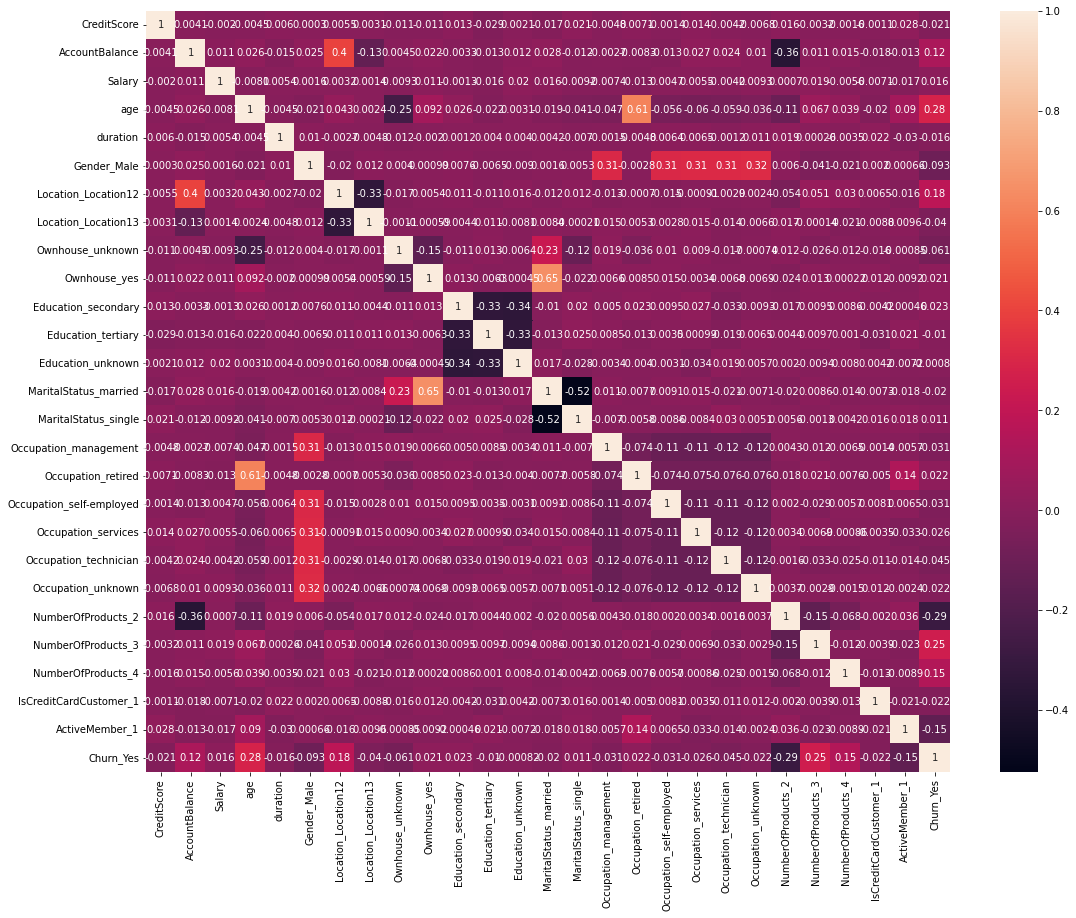

In [33]:
fig = plt.figure(figsize=(18,14))
sns.heatmap(temp1,annot=True)

In [34]:
## Convert Categorical Columns to Dummies
cat_cols=["Gender","Location","Ownhouse","Education","MaritalStatus","Occupation","NumberOfProducts","IsCreditCardCustomer","ActiveMember"]
churn_test = pd.get_dummies(churn_test,columns=cat_cols,drop_first=True,)

In [35]:
churn_test.head()

,CreditScore,AccountBalance,Salary,age,duration,Gender_Male,Location_Location12,Location_Location13,Ownhouse_unknown,Ownhouse_yes,Education_secondary,Education_tertiary,Education_unknown,MaritalStatus_married,MaritalStatus_single,Occupation_management,Occupation_retired,Occupation_self-employed,Occupation_services,Occupation_technician,Occupation_unknown,NumberOfProducts_2,NumberOfProducts_3,NumberOfProducts_4,IsCreditCardCustomer_1,ActiveMember_1
0,624,0.00,62825.03,49.427397,5.783562,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1
1,777,134571.50,118313.38,30.769863,4.835616,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,707,0.00,109688.82,55.210959,9.931507,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,746,172274.01,22374.97,38.249315,5.219178,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,762,0.00,43075.70,38.158904,12.375342,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1


**Train and Validation Split**

In [36]:
## Split the data into X and y
X = churn_train.copy().drop("Churn_Yes",axis=1)
Y = churn_train["Churn_Yes"]

In [37]:
x_train, x_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.30)

In [38]:
## Print the shape of X_train, X_test, y_train, y_test
print(x_train.shape)
print(x_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(5152, 26)
(2208, 26)
(5152,)
(2208,)


In [39]:
x_train.head()

,CreditScore,AccountBalance,Salary,age,duration,Gender_Male,Location_Location12,Location_Location13,Ownhouse_unknown,Ownhouse_yes,Education_secondary,Education_tertiary,Education_unknown,MaritalStatus_married,MaritalStatus_single,Occupation_management,Occupation_retired,Occupation_self-employed,Occupation_services,Occupation_technician,Occupation_unknown,NumberOfProducts_2,NumberOfProducts_3,NumberOfProducts_4,IsCreditCardCustomer_1,ActiveMember_1
3837,580.0,125921.37,94677.83,64.517808,11.550685,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
2660,637.0,0.00,149665.65,46.920548,4.972603,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1617,492.0,0.00,182865.09,51.800000,10.794521,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
2205,800.0,0.00,51553.43,41.079452,4.517808,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0
2471,620.0,159492.79,80582.34,42.419178,12.372603,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


**Standerdization**

In [40]:
#standerdization:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train.iloc[:,:5])

x_train.iloc[:,:5]=scaler.transform(x_train.iloc[:,:5])
x_validation.iloc[:,:5]=scaler.transform(x_validation.iloc[:,:5])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [41]:
x_train.head()

,CreditScore,AccountBalance,Salary,age,duration,Gender_Male,Location_Location12,Location_Location13,Ownhouse_unknown,Ownhouse_yes,Education_secondary,Education_tertiary,Education_unknown,MaritalStatus_married,MaritalStatus_single,Occupation_management,Occupation_retired,Occupation_self-employed,Occupation_services,Occupation_technician,Occupation_unknown,NumberOfProducts_2,NumberOfProducts_3,NumberOfProducts_4,IsCreditCardCustomer_1,ActiveMember_1
3837,-0.741198,0.780655,-0.095667,2.121978,1.121352,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
2660,-0.149078,-1.237526,0.863450,0.450246,-1.135353,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1617,-1.655347,-1.237526,1.442526,0.913792,0.861939,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
2205,1.544176,-1.237526,-0.847858,-0.104656,-1.291377,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0
2471,-0.325675,1.318714,-0.341526,0.022618,1.403323,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [42]:
x_validation.head()

,CreditScore,AccountBalance,Salary,age,duration,Gender_Male,Location_Location12,Location_Location13,Ownhouse_unknown,Ownhouse_yes,Education_secondary,Education_tertiary,Education_unknown,MaritalStatus_married,MaritalStatus_single,Occupation_management,Occupation_retired,Occupation_self-employed,Occupation_services,Occupation_technician,Occupation_unknown,NumberOfProducts_2,NumberOfProducts_3,NumberOfProducts_4,IsCreditCardCustomer_1,ActiveMember_1
2852,-1.800780,-1.237526,1.705057,0.390383,-1.272579,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1
6364,-0.388004,0.579146,-0.390248,0.103042,-0.609008,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
4975,-0.263347,0.174637,-1.174518,-0.325627,-0.497160,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1
7031,0.806623,0.582769,0.056399,0.117357,-0.120259,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0
2465,-2.340959,-1.237526,-0.679062,-0.449517,-0.836464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [43]:
###standerdization:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(churn_test.iloc[:,:5])

churn_test.iloc[:,:5]=scaler.transform(churn_test.iloc[:,:5])


In [44]:
churn_test.head()

,CreditScore,AccountBalance,Salary,age,duration,Gender_Male,Location_Location12,Location_Location13,Ownhouse_unknown,Ownhouse_yes,Education_secondary,Education_tertiary,Education_unknown,MaritalStatus_married,MaritalStatus_single,Occupation_management,Occupation_retired,Occupation_self-employed,Occupation_services,Occupation_technician,Occupation_unknown,NumberOfProducts_2,NumberOfProducts_3,NumberOfProducts_4,IsCreditCardCustomer_1,ActiveMember_1
0,-0.278113,-1.199986,-0.643200,0.672983,-0.829312,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1
1,1.310622,0.949791,0.312579,-1.063478,-1.157439,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0.583750,-1.199986,0.164022,1.211261,0.606481,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0.988721,1.552087,-1.339946,-0.367364,-1.024671,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1.154863,-1.199986,-0.983379,-0.375778,1.452403,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1


# Model Building

**Logistic Regression**

In [45]:
##logistic regression
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()

lrc.fit(x_train,y_train)

y_pred_train_lrc = lrc.predict(x_train)
y_pred_val_lrc = lrc.predict(x_validation)

In [46]:
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

print(classification_report(y_train,y_pred_train_lrc))
print(classification_report(y_validation,y_pred_val_lrc))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4127
           1       0.74      0.41      0.53      1025

    accuracy                           0.85      5152
   macro avg       0.81      0.69      0.72      5152
weighted avg       0.84      0.85      0.84      5152

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1741
           1       0.74      0.38      0.50       467

    accuracy                           0.84      2208
   macro avg       0.80      0.67      0.70      2208
weighted avg       0.83      0.84      0.82      2208



In [47]:
y_pred_train_lrc

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [48]:
y_pred_val_lrc

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [49]:
##test predictions
y_pred_test_lrc = lrc.predict(churn_test)

In [50]:
y_pred_test_lrc

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

**Random Forest**

In [51]:
##random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X = x_train,y = y_train)

train_predictions = rfc.predict(x_train)
val_predictions = rfc.predict(x_validation)

In [52]:
print(classification_report(y_train,train_predictions))
print(classification_report(y_validation,val_predictions))

pred_rfc_train=accuracy_score(y_train, train_predictions)
pred_rfc_val=accuracy_score(y_validation, val_predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4127
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      5152
   macro avg       1.00      1.00      1.00      5152
weighted avg       1.00      1.00      1.00      5152

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1741
           1       0.77      0.43      0.56       467

    accuracy                           0.85      2208
   macro avg       0.82      0.70      0.73      2208
weighted avg       0.84      0.85      0.84      2208



In [53]:
##test predictions
test_predictions = rfc.predict(churn_test)

In [54]:
test_predictions

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

**XGBOOST**

In [55]:
##xgboost
from xgboost import  XGBClassifier
X_classifier = XGBClassifier()
X_classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [56]:
xgboost_train_preds=X_classifier.predict(x_train)
xgboost_val_preds=X_classifier.predict(x_validation)

In [57]:
print("Classification Report")
print(classification_report(y_validation,xgboost_val_preds))
print("Classification Report")
print(classification_report(y_train,xgboost_train_preds))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1741
           1       0.76      0.43      0.55       467

    accuracy                           0.85      2208
   macro avg       0.81      0.70      0.73      2208
weighted avg       0.84      0.85      0.83      2208

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      4127
           1       0.82      0.48      0.61      1025

    accuracy                           0.88      5152
   macro avg       0.85      0.73      0.77      5152
weighted avg       0.87      0.88      0.86      5152



In [58]:
##test predictions
xgboost_test_preds=X_classifier.predict(churn_test)

In [59]:
xgboost_test_preds

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

In [61]:
temp=pd.read_excel("Test.xlsx")

In [62]:
samplesubmission = pd.DataFrame({'CustomerID':temp['CustomerID'],'Churn':xgboost_test_preds})

In [63]:
##file conversion
filename = 'mithoutput5.csv'

samplesubmission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: mithoutput5.csv


In [64]:
#samplesubmission = pd.DataFrame({'CustomerID':temp['CustomerID'],'Churn':xgboost_test_preds})

**Decision Tree**

In [65]:
##decision tree
dtc = DecisionTreeClassifier()

dtc.fit(x_train,y_train)

y_pred_train_dtc = dtc.predict(x_train)
y_pred_val_dtc = dtc.predict(x_validation)

In [66]:

print(classification_report(y_train,y_pred_train_dtc))
print(classification_report(y_validation,y_pred_val_dtc))

#pred_rfc_train=accuracy_score(y_train, y_pred_train_dtc)
#pred_rfc_test=accuracy_score(y_test, y_pred_test_dtc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4127
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      5152
   macro avg       1.00      1.00      1.00      5152
weighted avg       1.00      1.00      1.00      5152

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1741
           1       0.50      0.46      0.48       467

    accuracy                           0.79      2208
   macro avg       0.68      0.67      0.68      2208
weighted avg       0.78      0.79      0.79      2208



In [67]:
y_pred_test_dtc = dtc.predict(churn_test)

In [68]:
y_pred_test_dtc

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)